# GPT-4V


GPT-4のモデルそのものにvisionの機能を追加することで画像に対して回答することができるモデル．何が写っているかについては上手く答えることができるが，位置に関する詳細な質問には現状では回答することはできない．
- ドキュメント:https://platform.openai.com/docs/guides/vision

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fuyu-quant/data-science-wiki/blob/main/multimodal/image_to_text/gpt-4v.ipynb)

In [1]:
%%capture
!pip install openai

In [16]:
from openai import OpenAI
import os
from PIL import Image
import requests
import base64

api_key = ""
os.environ["OPENAI_API_KEY"] = api_key

### データの用意

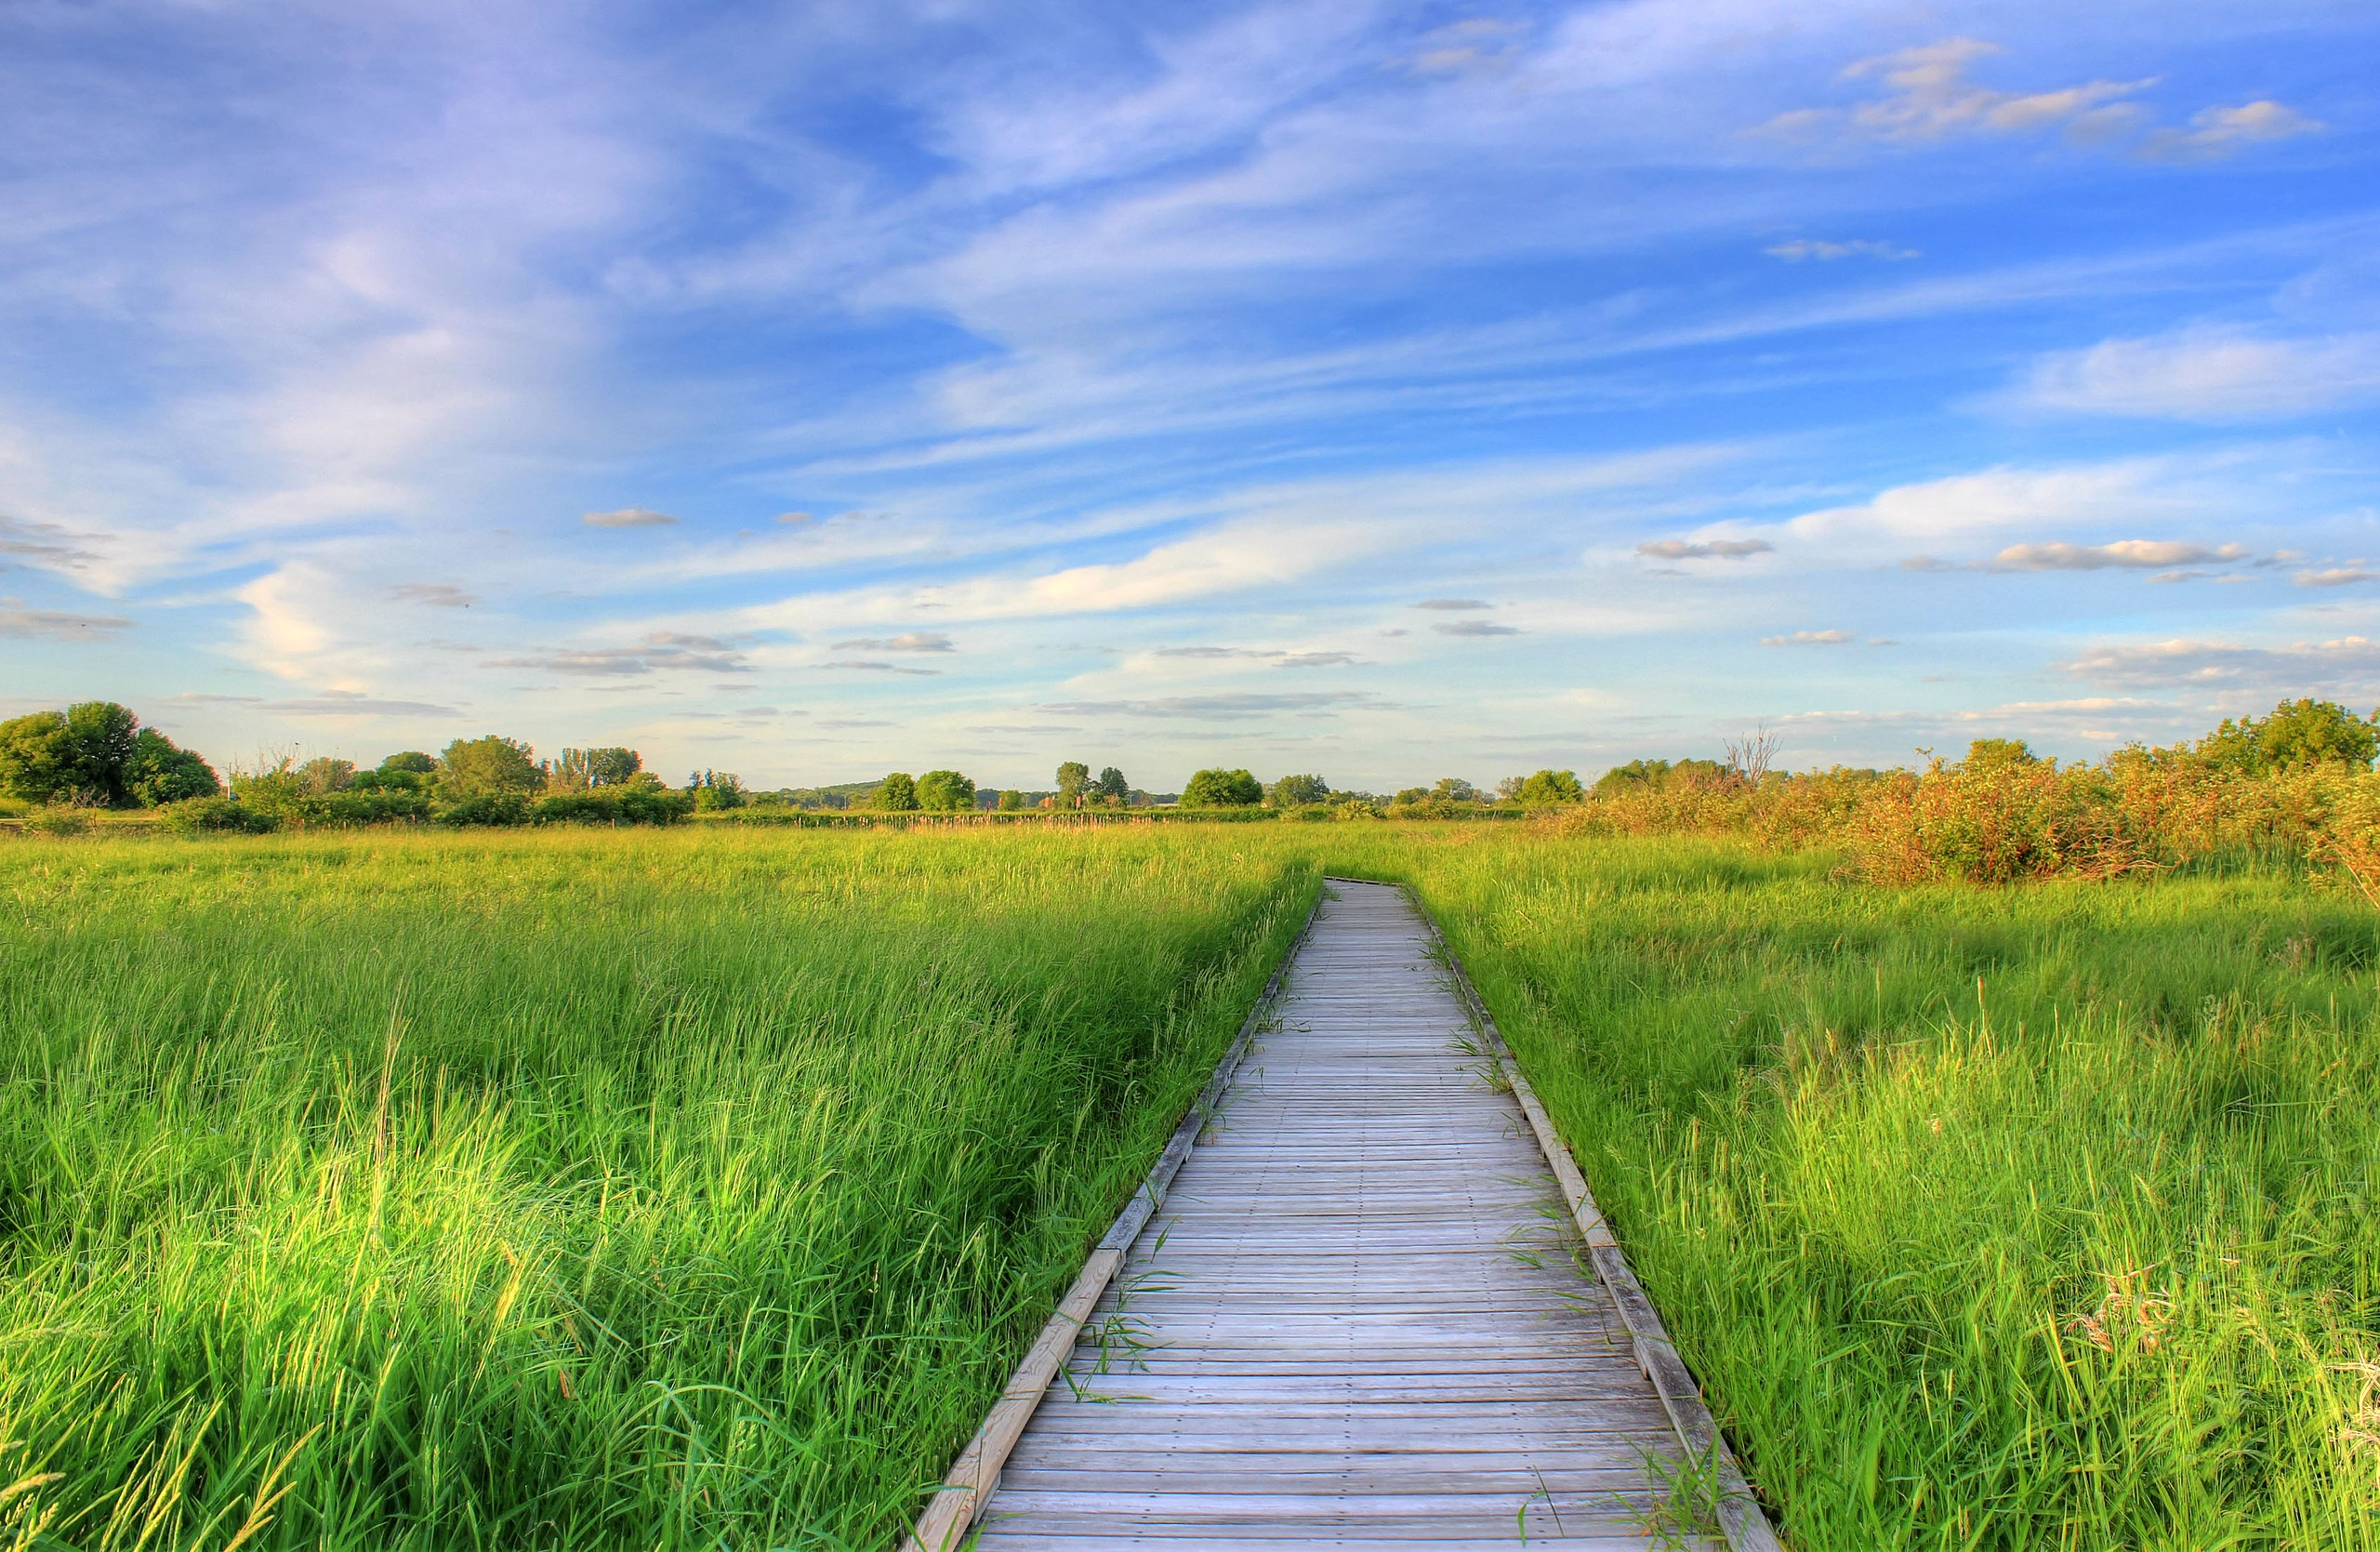

In [13]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
image.save("/content/sample.jpg", "JPEG")
image

### GPT-4V
* リンク先の画像に対してGPT-4Vを実行

In [24]:
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "これはなんの画像ですか?"},
                {
                    "type": "image_url",
                    "image_url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                },
            ],
        }
    ],
    max_tokens=300,
)

In [25]:
response.choices[0]

Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content='これは自然の中にある木製の遊歩道の画像です。画像には、眺望を楽しめる開放的な景色が広がっており、青い空、雲、そして緑の草原が見受けられます。遊歩道は訪れる人々に自然の中を歩く機会を与えますが、同時に植生を保護する役割も果たしています。', role='assistant', function_call=None, tool_calls=None), finish_details={'type': 'stop', 'stop': '<|fim_suffix|>'})

### GPT-4V
* 保存されている画像に対してGPT-4Vを実行

In [20]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


image_path = "/content/sample.jpg"
base64_image = encode_image(image_path)

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "画像には具体的に何が写っていますか?"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

{'id': 'chatcmpl-8IGdvUpesplHgoyJq5Pxnh772vNg1', 'object': 'chat.completion', 'created': 1699364571, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1127, 'completion_tokens': 176, 'total_tokens': 1303}, 'choices': [{'message': {'role': 'assistant', 'content': '画像には、草原または湿地と思われる自然の風景が写っています。中心には木製の歩道があり、その歩道は画像の奥に向かってまっすぐ伸びています。歩道の左右には緑の高草が茂っており、遠くには低木や数本の木が散在しています。上部は青空といくつかの雲で、とても晴れた日の様子を表しています。全体として平穏で自然豊かな環境を捉えた写真のようです。'}, 'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'}, 'index': 0}]}


In [22]:
response.json()

{'id': 'chatcmpl-8IGdvUpesplHgoyJq5Pxnh772vNg1',
 'object': 'chat.completion',
 'created': 1699364571,
 'model': 'gpt-4-1106-vision-preview',
 'usage': {'prompt_tokens': 1127,
  'completion_tokens': 176,
  'total_tokens': 1303},
 'choices': [{'message': {'role': 'assistant',
    'content': '画像には、草原または湿地と思われる自然の風景が写っています。中心には木製の歩道があり、その歩道は画像の奥に向かってまっすぐ伸びています。歩道の左右には緑の高草が茂っており、遠くには低木や数本の木が散在しています。上部は青空といくつかの雲で、とても晴れた日の様子を表しています。全体として平穏で自然豊かな環境を捉えた写真のようです。'},
   'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0}]}